### Data  Profilling

In [41]:
import pandas as pd
import numpy as np
import chardet as ch 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [42]:
data_final = pd.read_csv('./datasets/handling_result.csv',encoding='utf-8', index_col=False)
df = data_final.head()
df
# df.to_csv('./datasets/example_data.csv', index=False, encoding='utf-8')

URN          LANAME                          SCHNAME    TOWN  POSTCODE  \
0  100001  City of London  City of London School for Girls  London  EC2Y 8BB   
1  100002  City of London       St Paul's Cathedral School  London  EC4M 9AD   
2  100003  City of London            City of London School  London  EC4V 3AL   
3  100049          Camden                Haverstock School  London   NW3 2BQ   
4  100050          Camden           Parliament Hill School  London   NW5 1RL   

           MINORGROUP  ISSECONDARY GENDER     REGION NAME  PERCTOT  ...  \
0  Independent school            1  Girls     London East      NaN  ...   
1  Independent school            1  Mixed     London East      NaN  ...   
2  Independent school            1   Boys     London East      NaN  ...   
3   Maintained school            1  Mixed  London Central      6.9  ...   
4   Maintained school            1  Girls  London Central      5.3  ...   

  TEALGRP3  TNMOB  SENSE4  SENAPK4  SEN_ALL  KS2APS  TOTATT8 ATT8SCR  \
0       NP     NP     NaN      NaN      NaN      NP   6192.7    57.9   
1      NaN    NaN     NaN      NaN      NaN     NaN      NaN     NaN   
2       NP     NP     NaN      NaN      NaN      NP   3992.8      20   
3        0    190       8       16       24    27.6     8437    42.4   
4        0    172       2       16       18    29.7  10265.3    58.7   

  ATT8SCR_BOYS ATT8SCR_GIRLS  
0          NaN          57.9  
1          NaN           NaN  
2           20           NaN  
3         40.4          45.7  
4          NaN          58.7  

[5 rows x 40 columns]

## Step 1 Look at your data

### check encodings

In [44]:
#encoding格式是否需要完全一致？
path = "./datasets/handling_result.csv"
f = open(path,'rb')
data = f.read()
print(ch.detect(data))

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


### Check rows and file size

In [45]:
# rows
data_final.shape

(6464, 40)

### Check data types

In [46]:
#file size&data type
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6464 entries, 0 to 6463
Data columns (total 40 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   URN            6464 non-null   int64  
 1   LANAME         6464 non-null   object 
 2   SCHNAME        6464 non-null   object 
 3   TOWN           6240 non-null   object 
 4   POSTCODE       6459 non-null   object 
 5   MINORGROUP     6464 non-null   object 
 6   ISSECONDARY    6464 non-null   int64  
 7   GENDER         6464 non-null   object 
 8   REGION NAME    6396 non-null   object 
 9   PERCTOT        4237 non-null   float64
 10  PPERSABS10     4237 non-null   object 
 11  NOR            5642 non-null   float64
 12  NORG           5642 non-null   float64
 13  NORB           5642 non-null   float64
 14  NUMFSM         4223 non-null   float64
 15  NUMFSMEVER     4221 non-null   float64
 16  CONFEXAM       1997 non-null   object 
 17  TOTPUPS        5516 non-null   object 
 18  NUMBOYS 

In [47]:
data_final.columns

Index(['URN', 'LANAME', 'SCHNAME', 'TOWN', 'POSTCODE', 'MINORGROUP',
       'ISSECONDARY', 'GENDER', 'REGION NAME', 'PERCTOT', 'PPERSABS10', 'NOR',
       'NORG', 'NORB', 'NUMFSM', 'NUMFSMEVER', 'CONFEXAM', 'TOTPUPS',
       'NUMBOYS', 'NUMGIRLS', 'TPUP', 'BPUP', 'GPUP', 'TPRIORLO', 'TPRIORAV',
       'TPRIORHI', 'TFSM6CLA1A', 'TNOTFSM6CLA1A', 'TEALGRP2', 'TEALGRP1',
       'TEALGRP3', 'TNMOB', 'SENSE4', 'SENAPK4', 'SEN_ALL', 'KS2APS',
       'TOTATT8', 'ATT8SCR', 'ATT8SCR_BOYS', 'ATT8SCR_GIRLS'],
      dtype='object')

### Check data formats

## Step 2 Watch out special values 寻找特殊值

In [94]:
dd1 = data_final.iloc[:,0:9].describe(include='all')
dd1
# dd1.to_csv('./datasets/example_data_statitics_1.csv', index=False, encoding='utf-8')

URN LANAME            SCHNAME    TOWN POSTCODE MINORGROUP  \
count     6464.000000   6464               6464    6240     6459       6464   
unique            NaN    152               6104    1062     6033          6   
top               NaN   Kent  The King's School  London  CA4 0QS    Academy   
freq              NaN    195                  7     560        6       2737   
mean    130541.122215    NaN                NaN     NaN      NaN        NaN   
std      13941.244021    NaN                NaN     NaN      NaN        NaN   
min     100001.000000    NaN                NaN     NaN      NaN        NaN   
25%     119057.500000    NaN                NaN     NaN      NaN        NaN   
50%     136533.500000    NaN                NaN     NaN      NaN        NaN   
75%     140675.500000    NaN                NaN     NaN      NaN        NaN   
max     148433.000000    NaN                NaN     NaN      NaN        NaN   

        ISSECONDARY GENDER      REGION NAME  
count        6464.0   6464             6396  
unique          NaN      3               25  
top             NaN  Mixed  West Midlands C  
freq            NaN   5652              421  
mean            1.0    NaN              NaN  
std             0.0    NaN              NaN  
min             1.0    NaN              NaN  
25%             1.0    NaN              NaN  
50%             1.0    NaN              NaN  
75%             1.0    NaN              NaN  
max             1.0    NaN              NaN

- N/R 需要填充N
- NUMBOYS  特殊值NP
- NUMGIRLSa 特殊值NP
- TPUP/BPUP/PBPUP/GPUP 是否去掉

In [101]:
dd2= data_final.iloc[:,9:18].describe(include='all')
dd2
# dd2.to_csv('./datasets/example_data_statitics_2.csv', index=False, encoding='utf-8')

PERCTOT PPERSABS10          NOR         NORG         NORB  \
count   4237.000000       4237  5642.000000  5642.000000  5642.000000   
unique          NaN        512          NaN          NaN          NaN   
top             NaN       11.9          NaN          NaN          NaN   
freq            NaN         34          NaN          NaN          NaN   
mean       6.784234        NaN   683.753102   335.654555   348.098547   
std        4.135964        NaN   516.754484   300.941015   292.109564   
min        1.500000        NaN     0.000000     0.000000     0.000000   
25%        4.900000        NaN   173.250000    47.000000    80.250000   
50%        5.700000        NaN   667.500000   300.000000   312.000000   
75%        7.200000        NaN  1070.000000   536.000000   549.750000   
max       49.600000        NaN  2953.000000  1804.000000  1724.000000   

             NUMFSM   NUMFSMEVER CONFEXAM TOTPUPS  
count   4223.000000  4221.000000     1997    5516  
unique          NaN          NaN        1    1667  
top             NaN          NaN        R     NEW  
freq            NaN          NaN     1997     102  
mean     120.022969   202.149254      NaN     NaN  
std       97.902300   155.865929      NaN     NaN  
min        0.000000     0.000000      NaN     NaN  
25%       49.000000    76.000000      NaN     NaN  
50%       91.000000   167.000000      NaN     NaN  
75%      163.000000   288.000000      NaN     NaN  
max      919.000000  1216.000000      NaN     NaN

- PGPUP 是否使用
- PGPUP	 正常
- ATT8SCR	正常
- ATT8SCR_BOYS	 SUPP问题
- ATT8SCR_GIRLS  SUPP
- PERCTOT	PPERSABS10 正常
- NOR	PNORG	PNORB 正常

In [102]:
dd3 = data_final.iloc[:,18:29].describe(include='all')
dd3
# dd3.to_csv('./datasets/example_data_statitics_3.csv', index=False, encoding='utf-8')

NUMBOYS NUMGIRLS         TPUP  BPUP  GPUP TPRIORLO TPRIORAV TPRIORHI  \
count     5155     5147  5324.000000  4960  5057     5324     5324     5324   
unique    1053     1053          NaN   218   225       63      178      199   
top          0        0          NaN  SUPP  SUPP       NP       NP       NP   
freq        54       98          NaN   401   401     1360     1360     1360   
mean       NaN      NaN   111.224455   NaN   NaN      NaN      NaN      NaN   
std        NaN      NaN    86.164203   NaN   NaN      NaN      NaN      NaN   
min        NaN      NaN     1.000000   NaN   NaN      NaN      NaN      NaN   
25%        NaN      NaN    20.000000   NaN   NaN      NaN      NaN      NaN   
50%        NaN      NaN   113.000000   NaN   NaN      NaN      NaN      NaN   
75%        NaN      NaN   176.000000   NaN   NaN      NaN      NaN      NaN   
max        NaN      NaN   563.000000   NaN   NaN      NaN      NaN      NaN   

       TFSM6CLA1A TNOTFSM6CLA1A  
count        5324          5324  
unique        151           296  
top            NP            NP  
freq         1360          1360  
mean          NaN           NaN  
std           NaN           NaN  
min           NaN           NaN  
25%           NaN           NaN  
50%           NaN           NaN  
75%           NaN           NaN  
max           NaN           NaN

- PSENELSE	PSENELK	PNUMEAL	PNUMENGFL	PNUMUNCFL 正常
- NUMFSM	正常
- NUMFSMEVER 正常
- LANAME 
- SCHNAME	
- TOWN

In [104]:
dd4 = data_final.iloc[:,29:].describe(include='all')
dd4
# dd4.to_csv('./datasets/example_data_statitics_4.csv', index=False, encoding='utf-8')

TEALGRP1 TEALGRP3 TNMOB SENSE4 SENAPK4 SEN_ALL KS2APS TOTATT8 ATT8SCR  \
count      5324     5324  5324   3193    3193    3193   5324    5324    5324   
unique      320       27   337     22      77      81    294    4042     720   
top          NP        0    NP      1      10      12     NP    SUPP    SUPP   
freq       1376     3082  1376    572     150     133   1360     401     401   

       ATT8SCR_BOYS ATT8SCR_GIRLS  
count          4960          5057  
unique          630           631  
top            SUPP          SUPP  
freq           1096          1096

- POSTCODE	 有NULL 值
- MINORGROUP 正常
- ISPRIMARY	ISSECONDARY	ISPOST16 正常
- AGELOW  0岁	AGEHIGH 99岁
- GENDER 正常

- ATT8SCR 无特殊值
- TOTATT8ENG 无特殊值
- TPUP 无特殊值
- AGELOW 有0值
- AGEHIGH 99 有14个在继续教育类的学校下
==== PERCTOT 49.6 保留意见


- ICLOSE, EGENDER, TAB1618, LAESTAB, SCHOOLTYPE_y可以去掉
- NFTYPE, RELDENOM, ADMPOL_PT, TABKS2, CONFEXAM数据需要转换类型

In [52]:
# 计算TPUP中较小数字的个数，并根据个数判断是否为特殊值， TPUP = 4阶段的学生总数
find_small_TPUP_list = data_final['TPUP'].to_list()
count = 0
for i in find_small_TPUP_list:
    if(i<10):
        count+=1
print(count)

759


## Step 3 Is all the data there?

In [64]:
# 检查出现null的数据属性的情况
data_final.isnull().sum().sort_values(ascending=False)

CONFEXAM         4467
SEN_ALL          3271
SENAPK4          3271
SENSE4           3271
NUMFSMEVER       2243
NUMFSM           2241
PERCTOT          2227
PPERSABS10       2227
ATT8SCR_BOYS     1504
BPUP             1504
ATT8SCR_GIRLS    1407
GPUP             1407
NUMGIRLS         1317
NUMBOYS          1309
TNOTFSM6CLA1A    1140
TEALGRP2         1140
TEALGRP3         1140
TEALGRP1         1140
TPRIORHI         1140
TNMOB            1140
KS2APS           1140
TOTATT8          1140
ATT8SCR          1140
TFSM6CLA1A       1140
TPUP             1140
TPRIORAV         1140
TPRIORLO         1140
TOTPUPS           948
NORB              822
NORG              822
NOR               822
TOWN              224
REGION NAME        68
POSTCODE            5
LANAME              0
GENDER              0
ISSECONDARY         0
MINORGROUP          0
SCHNAME             0
URN                 0
dtype: int64

In [65]:
# data_final.head(10)

In [66]:
data_final.shape

(6464, 40)

## 需要进行数据处理

### 处理成绩字段(去除NULL， SUPP， NE )

In [67]:
# 删除成绩为空的数据
data_final_new = data_final.dropna(subset=["ATT8SCR"])
data_final_new.shape

(5324, 40)

In [69]:
data_final_new = data_final_new[data_final_new['ATT8SCR'] !='SUPP']
data_final_new.shape

(4923, 40)

In [70]:
data_final_new = data_final_new[data_final_new['ATT8SCR'] !='NE']
data_final_new.shape

(4527, 40)

### 成绩字段数据类型

In [79]:
data_final_new['ATT8SCR'] = data_final_new['ATT8SCR'].astype('float')

In [80]:
data_final_new.head(10)

URN          LANAME                            SCHNAME    TOWN  \
0   100001  City of London    City of London School for Girls  London   
2   100003  City of London              City of London School  London   
3   100049          Camden                  Haverstock School  London   
4   100050          Camden             Parliament Hill School  London   
5   100051          Camden                 Regent High School  London   
6   100052          Camden                   Hampstead School  London   
7   100053          Camden             Acland Burghley School  London   
8   100054          Camden        The Camden School for Girls  London   
9   100055          Camden  Maria Fidelis Catholic School FCJ  London   
10  100056          Camden               William Ellis School  London   

    POSTCODE          MINORGROUP  ISSECONDARY GENDER     REGION NAME  PERCTOT  \
0   EC2Y 8BB  Independent school            1  Girls     London East      NaN   
2   EC4V 3AL  Independent school            1   Boys     London East      NaN   
3    NW3 2BQ   Maintained school            1  Mixed  London Central      6.9   
4    NW5 1RL   Maintained school            1  Girls  London Central      5.3   
5    NW1 1RX   Maintained school            1  Mixed  London Central      6.7   
6    NW2 3RT   Maintained school            1  Mixed  London Central      5.4   
7    NW5 1UJ   Maintained school            1  Mixed  London Central      6.3   
8    NW5 2DB   Maintained school            1  Girls  London Central      3.9   
9    NW1 1LY   Maintained school            1  Mixed  London Central      5.3   
10   NW5 1RN   Maintained school            1   Boys  London Central      5.4   

    ... TEALGRP3  TNMOB  SENSE4  SENAPK4  SEN_ALL  KS2APS  TOTATT8 ATT8SCR  \
0   ...       NP     NP     NaN      NaN      NaN      NP   6192.7    57.9   
2   ...       NP     NP     NaN      NaN      NaN      NP   3992.8    20.0   
3   ...        0    190       8       16       24    27.6     8437    42.4   
4   ...        0    172       2       16       18    29.7  10265.3    58.7   
5   ...        0    142       6       13       19      28     6499    42.2   
6   ...        0    188       7       14       21    28.5   8969.4    44.8   
7   ...        0    128      10       23       33      29   6505.1    47.5   
8   ...        0    104       0       26       26    30.8   6784.5    63.4   
9   ...        0    111       2       14       16    28.7   5566.5    48.4   
10  ...        0    109       0        9        9    29.7   5144.3    46.3   

   ATT8SCR_BOYS ATT8SCR_GIRLS  
0           NaN          57.9  
2            20           NaN  
3          40.4          45.7  
4           NaN          58.7  
5          39.4          44.6  
6          43.3          46.6  
7          49.4            44  
8           NaN          63.4  
9          39.5          51.8  
10         46.3           NaN  

[10 rows x 40 columns]

In [81]:
data_final_new.to_csv('./datasets/handling_result_new.csv', index=False)

In [82]:
data_final_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4527 entries, 0 to 6104
Data columns (total 40 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   URN            4527 non-null   int64  
 1   LANAME         4527 non-null   object 
 2   SCHNAME        4527 non-null   object 
 3   TOWN           4442 non-null   object 
 4   POSTCODE       4526 non-null   object 
 5   MINORGROUP     4527 non-null   object 
 6   ISSECONDARY    4527 non-null   int64  
 7   GENDER         4527 non-null   object 
 8   REGION NAME    4477 non-null   object 
 9   PERCTOT        3509 non-null   float64
 10  PPERSABS10     3509 non-null   object 
 11  NOR            4334 non-null   float64
 12  NORG           4334 non-null   float64
 13  NORB           4334 non-null   float64
 14  NUMFSM         3511 non-null   float64
 15  NUMFSMEVER     3511 non-null   float64
 16  CONFEXAM       1184 non-null   object 
 17  TOTPUPS        4527 non-null   object 
 18  NUMBOYS 

In [83]:
data_final.columns

Index(['URN', 'LANAME', 'SCHNAME', 'TOWN', 'POSTCODE', 'MINORGROUP',
       'ISSECONDARY', 'GENDER', 'REGION NAME', 'PERCTOT', 'PPERSABS10', 'NOR',
       'NORG', 'NORB', 'NUMFSM', 'NUMFSMEVER', 'CONFEXAM', 'TOTPUPS',
       'NUMBOYS', 'NUMGIRLS', 'TPUP', 'BPUP', 'GPUP', 'TPRIORLO', 'TPRIORAV',
       'TPRIORHI', 'TFSM6CLA1A', 'TNOTFSM6CLA1A', 'TEALGRP2', 'TEALGRP1',
       'TEALGRP3', 'TNMOB', 'SENSE4', 'SENAPK4', 'SEN_ALL', 'KS2APS',
       'TOTATT8', 'ATT8SCR', 'ATT8SCR_BOYS', 'ATT8SCR_GIRLS'],
      dtype='object')

### 表属性信息
- 'URN',  School unique reference number，`english_school_infos`
- 'LANAME', Local authority name
- 'SCHNAME', School name
- 'TOWN', School town
- 'POSTCODE', School postcode
- 'MINORGROUP', Type of school / college eg maintained school
- 'ISPRIMARY', Does the school provide primary education? ( 0 = No, 1 = Yes)
- 'ISSECONDARY', Does the school provide secondary education? ( 0 = No, 1 = Yes)
- 'ISPOST16', Does the school provide post 16 education? (  0 = No, 1 = Yes)
- 'AGELOW', Lowest age of entry
- 'AGEHIGH', Highest age of entry
- 'GENDER',Indicates whether it's a mixed or single sex school
- #############################################################################
- 'PERCTOT', Percentage of overall absence, `england_abs`
- 'PPERSABS10', Percentage of enrolments who are persistent absentees
- #############################################################################
- 'NOR', Total number of pupils on roll, `england_census`
- 'NORG', Number of girls on roll
- 'NORB', Number of boys on roll
- 'TSENELSE', Number of SEN pupils with an EHC plan
- 'TSENELK', Number of eligible pupils with SEN support
- 'NUMEAL', No.  pupils where English not first language
- 'NUMENGFL', No. pupils with English first language
- 'NUMUNCFL', No. pupils where first language is unclassified
- 'NUMFSM', No. pupils eligible for free school meals
- 'NUMFSMEVER', Percentage of pupils eligible for FSM at any time during the past 6 years
- #############################################################################
- 'CONFEXAM', Indicates whether the school has checked its results (R=No; blank=Yes),`england_ks4final`
- 'TOTPUPS', Number of pupils on roll (all ages)
- 'NUMBOYS', Total boys on roll (including part-time pupils)
- 'NUMGIRLS', Total girls on roll (including part-time pupils)
- 'TPUP', Number of pupils at the end of key stage 4
- 'BPUP', Number of boys at the end of key stage 4
- 'PBPUP',Percentage of pupils at the end of key stage 4 who are boys
- 'GPUP', Number of girls at the end of key stage 4
- 'PGPUP', Percentage of pupils at the end key stage 4 who are girls
- 'KS2APS', Key stage 2 Average Points Score of the cohort at the end of key stage 4
- 'TOTATT8', Total sum of Attainment 8 scores
- 'ATT8SCR', Average Attainment 8 score per pupil
- 'ATT8SCR_GIRLS', Average Attainment 8 score per girl
- 'ATT8SCR_BOYS', Average Attainment 8 score per boy

### 属性可视化

In [84]:
import seaborn as sns
sns.set_theme(style="ticks", color_codes=True)
sns.set(style="white", color_codes=True)

#### Attainments 8 Scores 直方图和密度图

<AxesSubplot:ylabel='Frequency'>

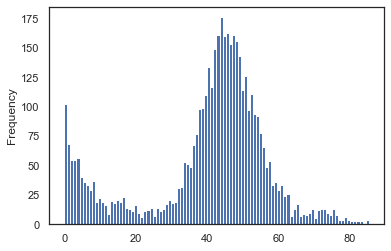

In [85]:
data_final_new['ATT8SCR'].plot.hist(bins=100)

<AxesSubplot:ylabel='Density'>

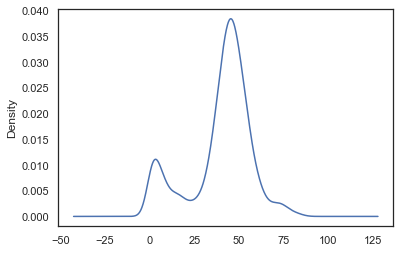

In [86]:
data_final_new['ATT8SCR'].plot.density()

#### A8score 与出勤的 Scatter 散点图

In [87]:
data1 = data_final_new[['PERCTOT','PPERSABS10','ATT8SCR']]
# data.fillna(data['PERCTOT'].mean())
data1.head()

PERCTOT PPERSABS10  ATT8SCR
0      NaN        NaN     57.9
2      NaN        NaN     20.0
3      6.9       18.8     42.4
4      5.3       12.5     58.7
5      6.7       19.2     42.2

/Users/shengdaolin_sh/dir_install/Aanconda3/anaconda3/envs/env_ds_python_37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='ATT8SCR', ylabel='PERCTOT'>

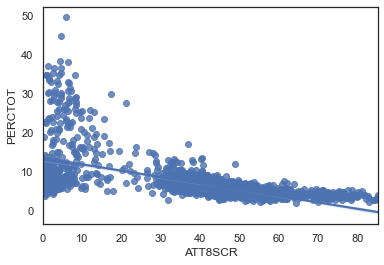

In [88]:
sns.regplot('ATT8SCR','PERCTOT', data=data1)

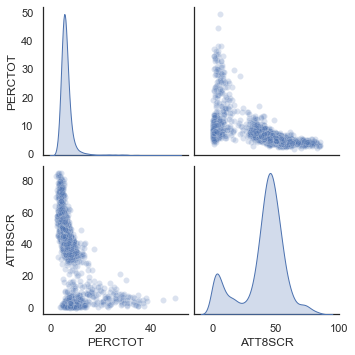

In [89]:
sns.pairplot(data1, diag_kind='kde', plot_kws={'alpha': 0.2})

In [90]:
# sns.set_theme(style="whitegrid", palette="muted")
# df = data_final_new[['MINORGROUP','ATT8SCR']]

In [91]:
# Draw a categorical scatterplot to show each observation
# ax = sns.swarmplot(data=df, x="ATT8SCR", y="MINORGROUP", hue="MINORGROUP")
# ax.set(ylabel="")

In [114]:
df = data_final[['ATT8SCR','PERCTOT', 'PPERSABS10']]
df = df.dropna(how='any')
df = df[df['ATT8SCR'] !='NE']
df = df[df['ATT8SCR'] !='SUPP']
df.shape
# df.to_csv('./datasets/score_absences3.csv', index=False, encoding='utf-8')

(3509, 3)

In [121]:
df1 = data_final[['ATT8SCR','NOR', 'NUMFSM']]
df1 = df1[df1['ATT8SCR'] !='NE']
df1 = df1[df1['ATT8SCR'] !='SUPP']
df1 = df1.dropna(how='any')
df1

ATT8SCR     NOR  NUMFSM
3       42.4   950.0   391.0
4       58.7  1170.0   315.0
5       42.2  1003.0   431.0
6       44.8  1308.0   298.0
7       47.5  1008.0   264.0
...      ...     ...     ...
6061    36.7  1623.0   323.0
6062      38  1332.0   316.0
6064    45.2   425.0    60.0
6086    35.3   626.0    62.0
6104    33.9   794.0   176.0

[3511 rows x 3 columns]

In [123]:
df1.to_csv('./datasets/score_fsm3.csv', index=False, encoding='utf-8')